<a href="https://colab.research.google.com/github/diahalaydrus1904/-Bank-Transaction-Dataset-for-Fraud-Detection/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Rodiah_Hasan_Alaydrus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [ ]:
# Mengimpor library yang dibutuhkan untuk proyek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import joblib
from google.colab import drive
from google.colab import files

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [ ]:
# Load (Memuat) data
url = 'https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [ ]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [ ]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [ ]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

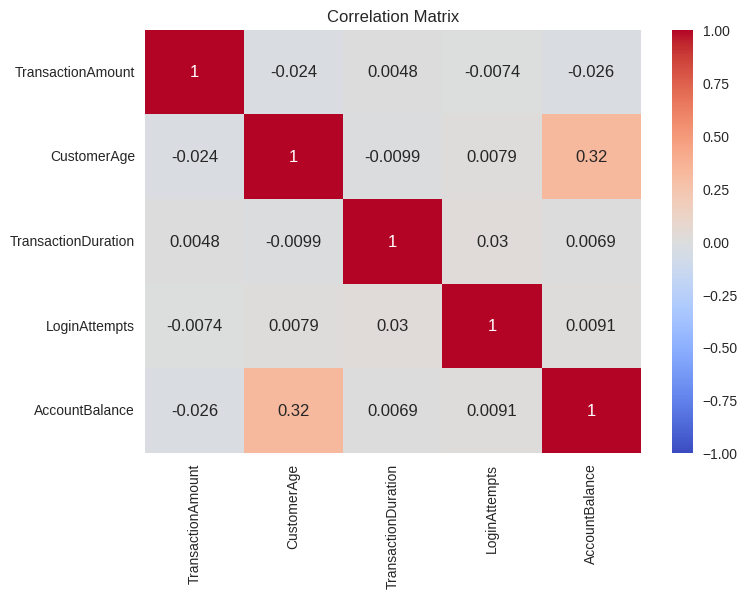

In [ ]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

# Pilih kolom numerik
numerical_cols = df.select_dtypes(include=['number']).columns
plt.figure()

# Hitung Matriks Korelasi
correlation_matrix = df[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

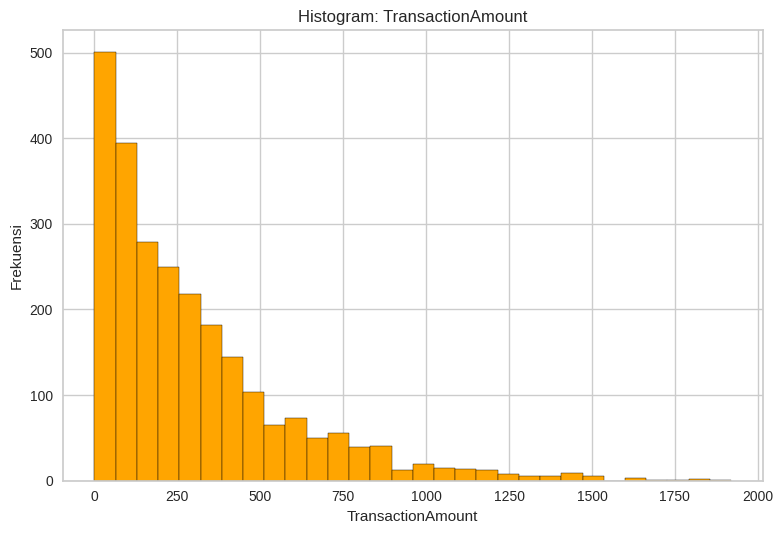

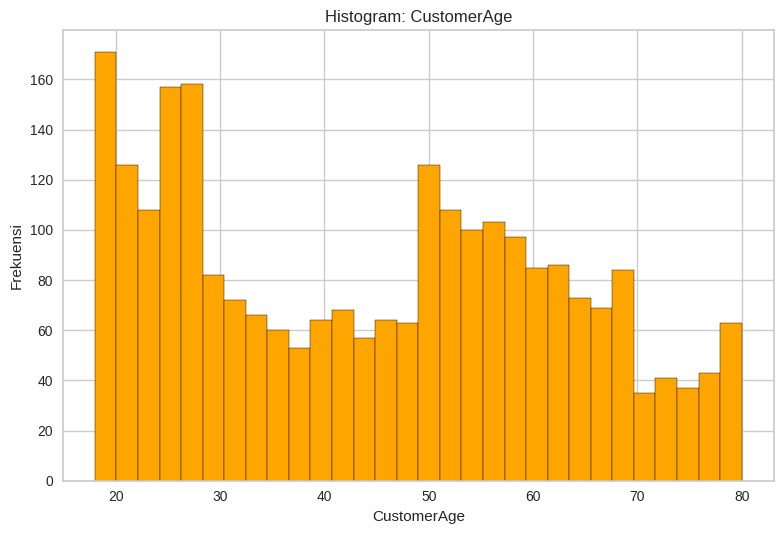

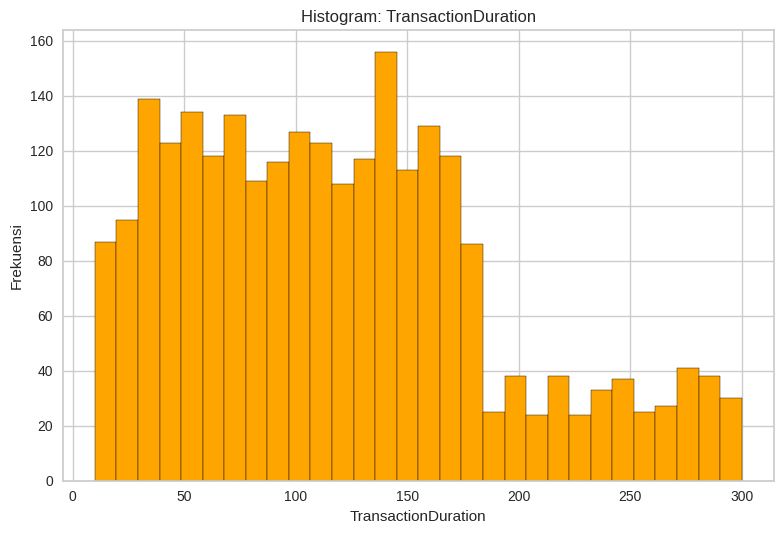

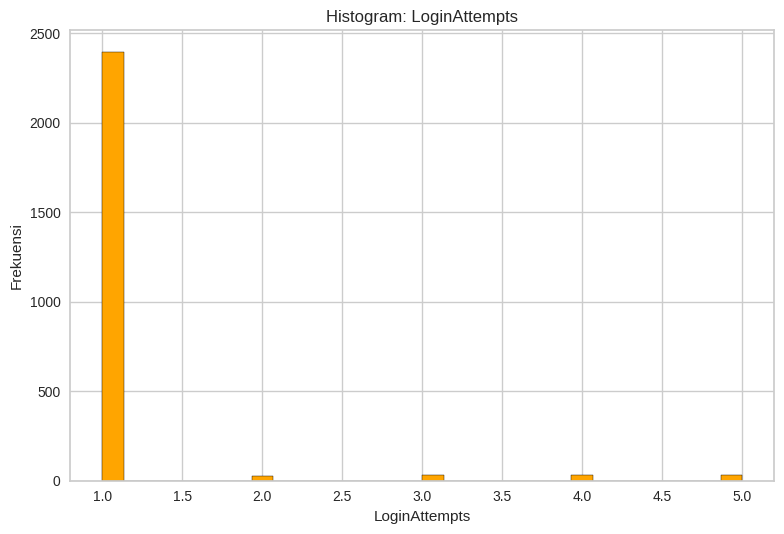

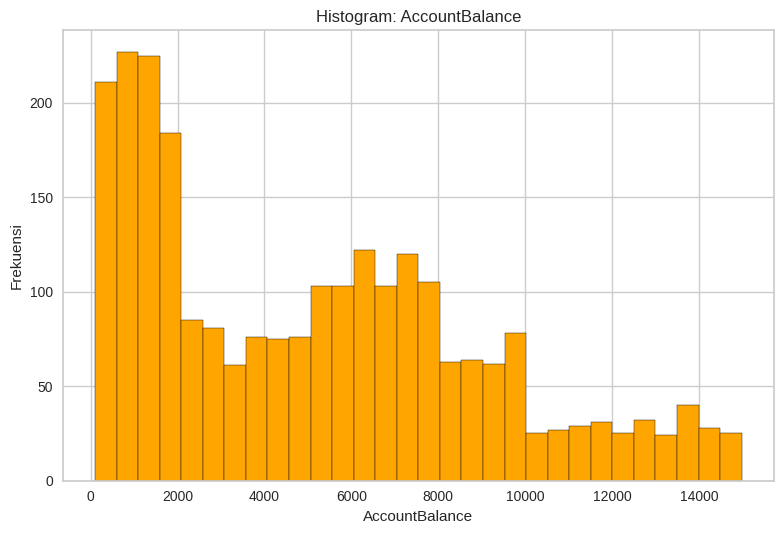

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
for col in numerical_cols:
    plt.figure()
    plt.hist(df[col].dropna(), bins=30, color="orange", edgecolor="black")
    plt.title(f'Histogram: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

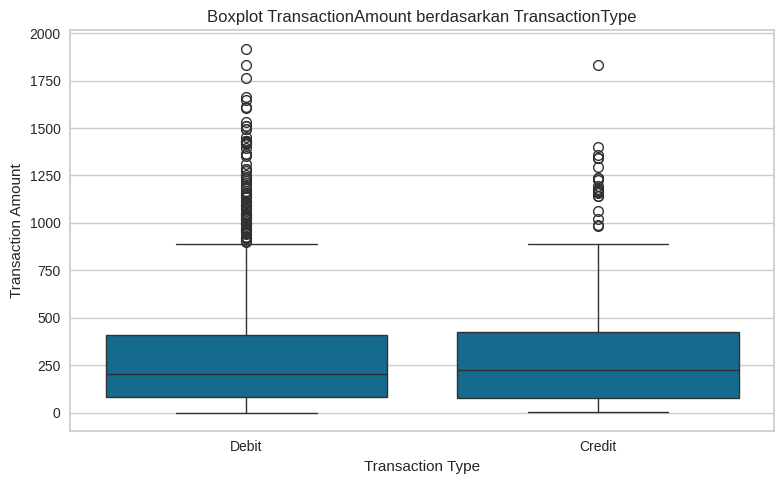

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
# Boxplot untuk melihat distribusi TransactionAmount terhadap TransactionType
plt.figure(figsize=(8,5))
sns.boxplot(x="TransactionType", y="TransactionAmount", data=df)
plt.title("Boxplot TransactionAmount berdasarkan TransactionType")
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Amount")
plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [ ]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [ ]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [ ]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

# Melakukan standarisasi pada fitur numerik menggunakan StandardScaler,
standard_scaler = StandardScaler()

# Hasil standarisasi disimpan kembali pada kolom numerik dataframe
df[numerical_cols] = standard_scaler.fit_transform(df[numerical_cols])

# Menampilkan Hasil
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,-0.970546,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,TX000002,AC00455,0.268963,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,TX000003,AC00019,-0.586526,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,TX000004,AC00070,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,TX000005,AC00411,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [ ]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(columns=["TransactionID", "AccountID", "DeviceID", "IP Address", "MerchantID"])

# Menampilkan hasil
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,2023-04-11 16:29:14,Debit,San Diego,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,0.268963,2023-06-27 16:44:19,Debit,Houston,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,-0.586526,2023-07-10 18:16:08,Debit,Mesa,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [ ]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

# Pilih kolom kategorikal
category_features = df.select_dtypes(include=['object']).columns

# Buat dictionary untuk menyimpan encoder per kolom
encoders = {}

# Encoding setiap kolom
for col in category_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# Menampilkan hasil
df.head()


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,680,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,105
1,0.268963,1178,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,192
2,-0.586526,1262,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,41
3,-0.387294,818,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,163
4,-0.972736,1939,0,1,2,NaN,3,1.121495,-0.204629,0.594263,16


In [ ]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

# Menggunakan metode imputasi fillna untuk manangani data yang hilang dengan median
df = df.fillna(df.median())

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,680,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,105
1,0.268963,1178,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,192
2,-0.586526,1262,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,41
3,-0.387294,818,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,163
4,-0.972736,1939,0,1,2,0.018031,3,1.121495,-0.204629,0.594263,16


In [ ]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,680,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,105
1,0.268963,1178,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,192
2,-0.586526,1262,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,41
3,-0.387294,818,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,163
4,-0.972736,1939,0,1,2,0.018031,3,1.121495,-0.204629,0.594263,16


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

# Mengidentifikasi outliers menggunakan IQR
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Pilih baris berdasarkan kondisi dari kerangka data asliPilih baris berdasarkan kondisi dari kerangka data asli
df_filtered = df.loc[condition]

# Menampilkan beberapa baris pertama dari kerangka data yang difilter
df = df_filtered.copy()
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,680,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,105
1,0.268963,1178,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,192
2,-0.586526,1262,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,41
3,-0.387294,818,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,163
4,-0.972736,1939,0,1,2,0.018031,3,1.121495,-0.204629,0.594263,16


AgeBin
Sangat Rendah    501
Rendah           427
Sedang           482
Tinggi           439
Sangat Tinggi    437
Name: count, dtype: int64


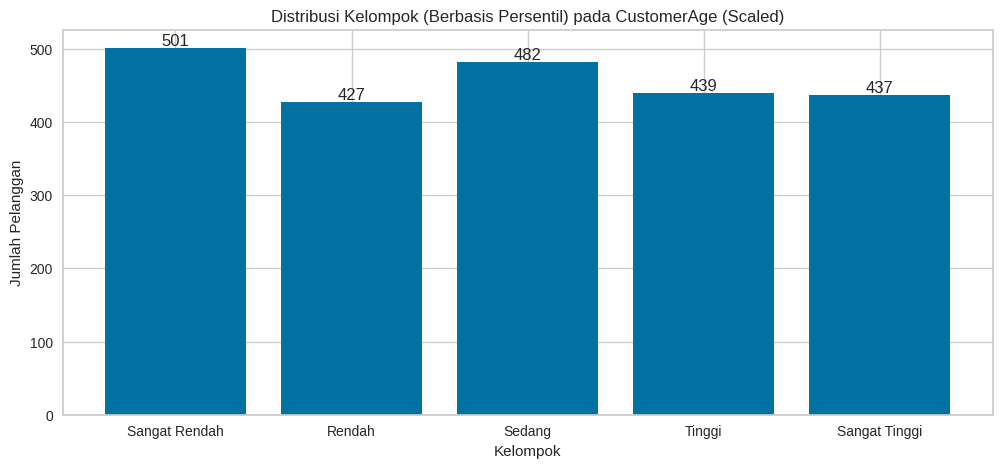

In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# Membuat binning di variable sementara agar tidak menganggu dataframe asli
temp = df[['CustomerAge']].copy()

# Binning berbasis persentil (5 kelompok ~ sama banyak)
labels = ['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']
temp['AgeBin'] = pd.qcut(temp['CustomerAge'], q=5, labels=labels, duplicates='drop')

# Encode hasil binning
le = LabelEncoder()
temp['AgeBin_LE'] = le.fit_transform(temp['AgeBin'].astype(str))

# Hitung frekuensi & plot
counts = temp['AgeBin'].value_counts().reindex(labels)
print(counts)

plt.figure(figsize=(12,5))
plt.bar(labels, counts.values)
for i, v in enumerate(counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.title("Distribusi Kelompok (Berbasis Persentil) pada CustomerAge (Scaled)")
plt.xlabel("Kelompok")
plt.ylabel("Jumlah Pelanggan")
plt.show()

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [ ]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2286.000000,2286.000000,2286.000000,2286.000000,2286.000000,2286.000000,2286.000000,2286.000000,2.286000e+03,2286.000000,2286.000000
mean,-0.146053,1253.901575,0.788714,21.354768,1.010499,-0.002157,1.530621,-0.007660,-2.046294e-01,0.001821,180.723972
std,0.741574,723.862593,0.439290,12.429289,0.827786,0.989640,1.147990,0.992605,9.189106e-15,0.990816,103.739332
min,-1.017881,0.000000,0.000000,0.000000,0.000000,-1.495947,0.000000,-1.561745,-2.046294e-01,-1.286100,0.000000
25%,-0.749991,631.250000,1.000000,11.000000,0.000000,-0.991288,1.000000,-0.805299,-2.046294e-01,-0.920775,92.000000
50%,-0.334192,1250.500000,1.000000,21.000000,1.000000,0.018031,2.000000,-0.105944,-2.046294e-01,-0.097334,181.000000
75%,0.256085,1878.750000,1.000000,32.000000,2.000000,0.803056,3.000000,0.593411,-2.046294e-01,0.643057,271.000000
max,2.050618,2485.000000,2.000000,43.000000,3.000000,1.980594,4.000000,2.577295,-2.046294e-01,2.531190,360.000000


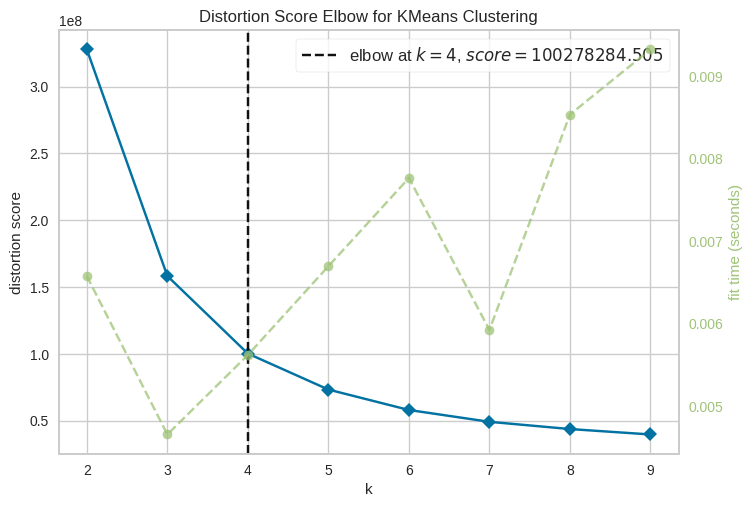

In [ ]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(2, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df.values)

# Menampilkan grafik elbow untuk analisis
visualizer.show();

In [ ]:
# Menggunakan algoritma K-Means Clustering

# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 4
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df.values)

# Mendapatkan label cluster
labels = kmeans.labels_

Jalankan cell code ini untuk menyimpan model kamu.

In [ ]:
# Menyimpan model menggunakan joblib
joblib.dump(kmeans, "model_clustering.h5")
files.download("model_clustering.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.
sil_score = silhouette_score(df.values, labels)
sil_score

np.float64(0.4981520719011526)

/tmp/ipython-input-2006274397.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.values_2d = pca_vis.fit_transform(df.values)


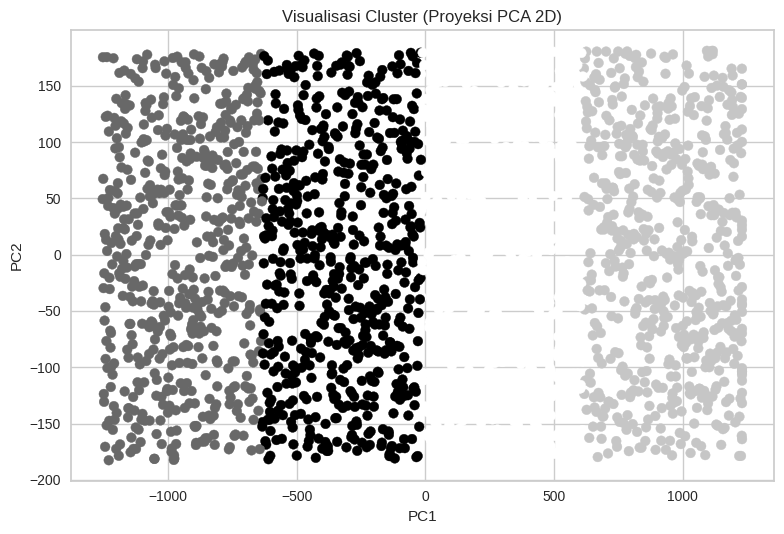

In [ ]:
# Membuat visualisasi hasil clustering
pca_vis = PCA(n_components=2, random_state=42)
df.values_2d = pca_vis.fit_transform(df.values)

plt.figure()
scatter = plt.scatter(df.values_2d[:, 0], df.values_2d[:, 1], c=labels)
plt.title("Visualisasi Cluster (Proyeksi PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Membangun model menggunakan PCA.
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df.values)

# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
PCA_1_2 = pd.DataFrame(X_pca, columns=['PCA_1', 'PCA_2'])

# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
model_kmeans_pca = KMeans(n_clusters=4, random_state=42, n_init=10)
model_kmeans_pca.fit(PCA_1_2)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
joblib.dump(model_kmeans_pca, "PCA_model_clustering.h5")
files.download("PCA_model_clustering.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.

# Menambahkan hasil label cluster dari KMeans ke dalam kolom 'Cluster'
df['Cluster'] = kmeans.labels_

# Mengelompokkan data berdasarkan cluster dan menghitung nilai mean, min, dan max untuk setiap fitur numerik dalam masing-masing cluster
per_cluster = df.groupby('Cluster')[numerical_cols].agg(['mean', 'min', 'max'])

# Menampilkan ringkasan hasil agregasi per cluster
print(per_cluster)

        TransactionAmount                     CustomerAge                      \
                     mean       min       max        mean       min       max   
Cluster                                                                         
0               -0.095362 -1.017676  2.028200    0.023501 -1.495947  1.980594   
1               -0.179979 -1.017881  2.050618    0.013874 -1.495947  1.980594   
2               -0.151030 -1.015827  1.985656   -0.072788 -1.495947  1.980594   
3               -0.157647 -1.013945  2.022484    0.024991 -1.495947  1.980594   

        TransactionDuration                     LoginAttempts            \
                       mean       min       max          mean       min   
Cluster                                                                   
0                  0.014353 -1.561745  2.563023     -0.204629 -0.204629   
1                  0.009737 -1.561745  2.577295     -0.204629 -0.204629   
2                 -0.039067 -1.561745  2.563023     -0.20

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (Nasabah Seimbang dengan Usia Rata-Rata dan Saldo Stabil)**:
  - **Rata-rata Transaction Amount:** -0.095
  - **Rata-rata Customer Age:** 0.02
  - **Rata-rata Transaction Duration:** 0.014
  - **Rata-rata Login Attempts:** -0.204
  - **Rata-rata Account Balance:** -0.002
  - **Analisis:** Cluster ini berisi pelanggan dengan karakteristik seimbang. Usia rata-rata netral, transaksi relatif kecil, durasi transaksi normal, serta saldo akun yang stabil. Kelompok ini bisa dianggap sebagai pelanggan umum dengan kondisi finansial cukup stabil.

2. **Cluster 1: (Nasabah dengan Saldo Lebih Tinggi meskipun Transaksi Kecil)**:
  - **Rata-rata Transaction Amount:** -0.179
  - **Rata-rata Customer Age:** 0.013
  - **Rata-rata Transaction Duration:** 0.009
  - **Rata-rata Login Attempts:** -0.204
  - **Rata-rata Account Balance:** 0.028
  - **Analisis:** Cluster ini menunjukkan pelanggan dengan saldo akun relatif lebih tinggi dibanding cluster lain, walaupun nominal transaksi cenderung kecil dan aktivitas login rendah. Mereka cenderung menyimpan lebih banyak saldo daripada bertransaksi aktif.

3. **Cluster 2: (Nasabah Muda dengan Saldo Rendah)**:
  - **Rata-rata Transaction Amount:** -0.151
  - **Rata-rata Customer Age:** -0.073
  - **Rata-rata Transaction Duration:** -0.039
  - **Rata-rata Login Attempts:** -0.204
  - **Rata-rata Account Balance:** -0.021
  - **Analisis:** Cluster ini terdiri dari pelanggan yang relatif lebih muda dengan saldo akun yang rendah. Transaksi mereka bernilai kecil dan berlangsung singkat. Karakteristik ini menunjukkan kelompok dengan daya beli terbatas dan keterlibatan rendah dalam aktivitas finansial.

4. **Cluster 3: (Nasabah Hemat dengan Usia Lebih Tua dan Saldo Menengah)**:
  - **Rata-rata Transaction Amount:** -0.158
  - **Rata-rata Customer Age:** 0.025
  - **Rata-rata Transaction Duration:** -0.016
  - **Rata-rata Login Attempts:** -0.204
  - **Rata-rata Account Balance:** 0.001
  - **Analisis:** Cluster ini menggambarkan pelanggan dengan usia sedikit lebih tua dan saldo akun stabil. Nominal transaksi kecil dan durasi transaksi singkat. Kelompok ini cenderung berhati-hati dalam pengeluaran serta lebih fokus menjaga kestabilan saldo akun.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

# Mengganti nama kolom Cluster menjadi Target
df = df.rename(columns={'Cluster': 'Target'})

# Menampilkan Hasil
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,-0.970546,680,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,105,3
1,0.268963,1178,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,192,3
2,-0.586526,1262,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,41,0
3,-0.387294,818,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,163,3
4,-0.972736,1939,0,1,2,0.018031,3,1.121495,-0.204629,0.594263,16,1


In [ ]:
# Simpan Data
drive.mount('/content/drive')
df.to_csv("/content/drive/MyDrive/data_clustering.csv", index=False)
files.download("/content/drive/MyDrive/data_clustering.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal untuk numerikal
df[numerical_cols] = standard_scaler.inverse_transform(df[numerical_cols])

# tampilkan dataset yang sudah di-inverse
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105,3
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192,3
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41,0
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163,3
4,13.45,1939,0,1,2,45.0,3,198.0,1.0,7429.40,16,1


In [ ]:
# inverse dataset yang sudah diencode ke kategori aslinya.
for col in category_features:
    df[col] = encoders[col].inverse_transform(df[col])

# tampilkan dataset yang sudah di-inverse
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,3
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,3
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,0
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,3
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,1


In [ ]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

# Menambahkan hasil label cluster dari KMeans ke dalam kolom 'Cluster'
df['Cluster'] = kmeans.labels_

# Untuk fitur numerik: dihitung rata-rata (mean), nilai minimum (min), dan nilai maksimum (max)
per_cluster_num = df.groupby('Cluster')[numerical_cols].agg(['mean', 'min', 'max'])
print(per_cluster_num)

# Untuk fitur kategorikal: dihitung nilai yang paling sering muncul (mode, direpresentasikan dengan lambda)
per_cluster_cat = df.groupby('Cluster')[category_features].agg(lambda x: x.mode()[0])
print(per_cluster_cat)

        TransactionAmount               CustomerAge              \
                     mean   min     max        mean   min   max   
Cluster                                                           
0              269.794355  0.32  890.24   45.097561  18.0  80.0   
1              245.071500  0.26  896.79   44.925862  18.0  80.0   
2              253.529625  0.86  877.81   43.380357  18.0  80.0   
3              251.596469  1.41  888.57   45.124126  18.0  80.0   

        TransactionDuration              LoginAttempts            \
                       mean   min    max          mean  min  max   
Cluster                                                            
0                120.428571  10.0  299.0           1.0  1.0  1.0   
1                120.105172  10.0  300.0           1.0  1.0  1.0   
2                116.685714  10.0  299.0           1.0  1.0  1.0   
3                118.256993  10.0  298.0           1.0  1.0  1.0   

        AccountBalance                    
          

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 0: (Nasabah Muda dengan Saldo Menengah dan Aktivitas Moderat)**:
  - **Rata-rata Transaction Amount:** 269.79
  - **Rata-rata Customer Age**: 45.10 tahun
  - **Rata-rata Transaction Duration:** 120.43 detik
  - **Rata-rata Login Attempts:** 1 kali
  - **Rata-rata Account Balance:** 5,104.79
  - **Rata-rata Occupation:** Student
  - **Rata-rata Transaction Type:** Debit
  - **Rata-rata Location:** Houston
  - **Rata-rata Channel:** ATM
  - **Analisis:** Cluster ini berisi nasabah dengan usia menengah (sekitar 45 tahun) dan saldo akun menengah. Mereka melakukan transaksi dengan nominal sedang dan durasi moderat. Mayoritas adalah pelajar/mahasiswa yang bertransaksi melalui ATM di kota besar, menunjukkan pola penggunaan layanan dasar perbankan.

2. **Cluster 1: (Nasabah Dewasa dengan Saldo Sedikit Lebih Tinggi dan Transaksi Konservatif)**:
  - **Rata-rata Transaction Amount:** 245.07
  - **Rata-rata Customer Age**: 44.93 tahun
  - **Rata-rata Transaction Duration:** 120.11 detik
  - **Rata-rata Login Attempts:** 1 kali
  - **Rata-rata Account Balance:** 5,222.13
  - **Rata-rata Occupation:** Engineer
  - **Rata-rata Transaction Type:** Debit
  - **Rata-rata Location:** Philadelphia
  - **Rata-rata Channel:** Branch
  - **Analisis:** Cluster ini mencakup nasabah dengan usia serupa cluster 0, namun memiliki saldo sedikit lebih tinggi. Karakteristik utamanya adalah transaksi dengan nominal sedang, cenderung stabil, dilakukan di cabang bank. Sebagian besar berprofesi sebagai engineer dengan pola transaksi konservatif.

3. **Cluster 2: (Nasabah Muda dengan Saldo Rendah dan Transaksi Singkat)**:
  - **Rata-rata Transaction Amount:** 253.53
  - **Rata-rata Customer Age**: 43.38 tahun
  - **Rata-rata Transaction Duration:** 116.69 detik
  - **Rata-rata Login Attempts:** 1 kali
  - **Rata-rata Account Balance:** 5,032.32
  - **Rata-rata Occupation:** Student
  - **Rata-rata Transaction Type:** Debit
  - **Rata-rata Location:** Boston
  - **Rata-rata Channel:** Branch
  - **Analisis:** Cluster ini menampilkan nasabah relatif lebih muda dengan saldo akun lebih rendah dibanding cluster lain. Transaksi mereka sedikit lebih singkat dan bernilai sedang. Kelompok ini didominasi oleh pelajar/mahasiswa dengan pola transaksi cabang, daya beli terbatas, serta keterlibatan finansial lebih rendah.

4. **Cluster 3: (Nasabah Dewasa dengan Saldo Stabil dan Transaksi Konsisten)**:
  - **Rata-rata Transaction Amount:** 251.60
  - **Rata-rata Customer Age**: 45.12 tahun
  - **Rata-rata Transaction Duration:** 118.26 detik
  - **Rata-rata Login Attempts:** 1 kali
  - **Rata-rata Account Balance:** 5,119.79
  - **Rata-rata Occupation:** Doctor
  - **Rata-rata Transaction Type:** Debit
  - **Rata-rata Location:** Fresno
  - **Rata-rata Channel:** Branch
  - **Analisis:** Cluster ini mencerminkan nasabah dengan usia sedikit lebih tua dan saldo yang stabil. Transaksi bernilai sedang dan dilakukan secara konsisten dengan durasi mirip cluster lain. Mayoritas berprofesi sebagai dokter, menunjukkan kelompok profesional yang stabil secara finansial dan menggunakan layanan perbankan cabang.



(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

# Mengganti nama kolom Cluster menjadi Target
df = df.rename(columns={'Cluster': 'Target'})

# Menghapus kolom 'Target' yang duplikat
df = df.loc[:, ~df.columns.duplicated()]

# Menampilkan Hasil
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,3
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,3
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,0
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,3
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,1


In [ ]:
# Simpan Data
df.to_csv("/content/drive/MyDrive/data_clustering_inverse.csv", index=False)
files.download("/content/drive/MyDrive/data_clustering_inverse.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

End of Code.